In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, shapiro, probplot
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm

In [2]:
data_path = "../data/raw_dataset.xlsx"
data = pd.read_excel(data_path)

## 1. Applying Log tranformation for Y1 and Y2 

- As we observed in the EDA Y varibales were positively skewed. So we are applying Log transformation to normalize them

In [3]:
data['Distance (Light)'] = np.log(data['Distance (Light)'])
data['Distance (Dark)'] = np.log(data['Distance (Dark)'])

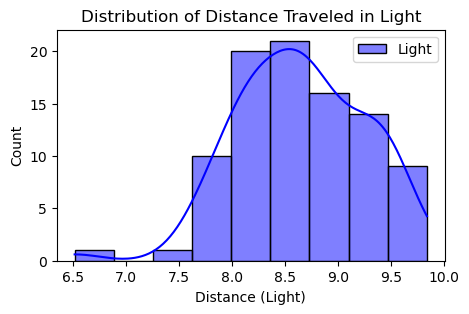

Skewness of y: -0.3138103765473107


In [4]:
# Plot distributions of distances (Light)
plt.figure(figsize=(5, 3))
sns.histplot(data['Distance (Light)'], kde=True, color="blue", label="Light")
plt.legend()
plt.title("Distribution of Distance Traveled in Light")
plt.show()

# Plot distributions of distances (Light)
print("Skewness of y:", skew(data['Distance (Light)']))

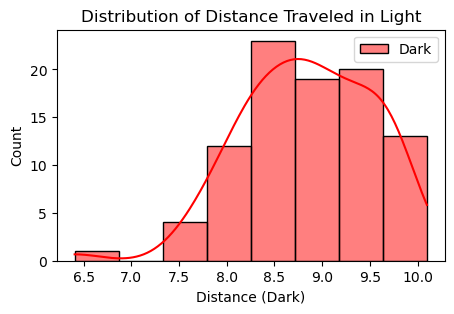

Skewness of y: -0.47535762995599007


In [5]:
# Plot distributions of distances (Dark)
plt.figure(figsize=(5, 3))
sns.histplot(data['Distance (Dark)'], kde=True, color="red", label="Dark")
plt.legend()
plt.title("Distribution of Distance Traveled in Light")
plt.show()

# Plot distributions of distances (Light)
print("Skewness of y:", skew(data['Distance (Dark)']))

## 2. Applying MinMax Transformation for Predictor Variables

In [6]:
scaler = MinMaxScaler()
X_columns = ['Be', 'Cr', 'Fe', 'Ni', 'Cu', 'As', 'Cd', 'Ba', 'Tl', 'Pb', 'U']
data[X_columns] = scaler.fit_transform(data[X_columns])

## 3.Outlier Handling

- In this visualization, we created boxplots for each chemical concentration to explore the data distribution and identify potential outliers. To make individual data points more visible, especially the outliers, we used a strip plot overlay (red points) on top of each boxplot. This approach provides a clearer view of how each observation compares to the typical range (as shown by the box) for each chemical

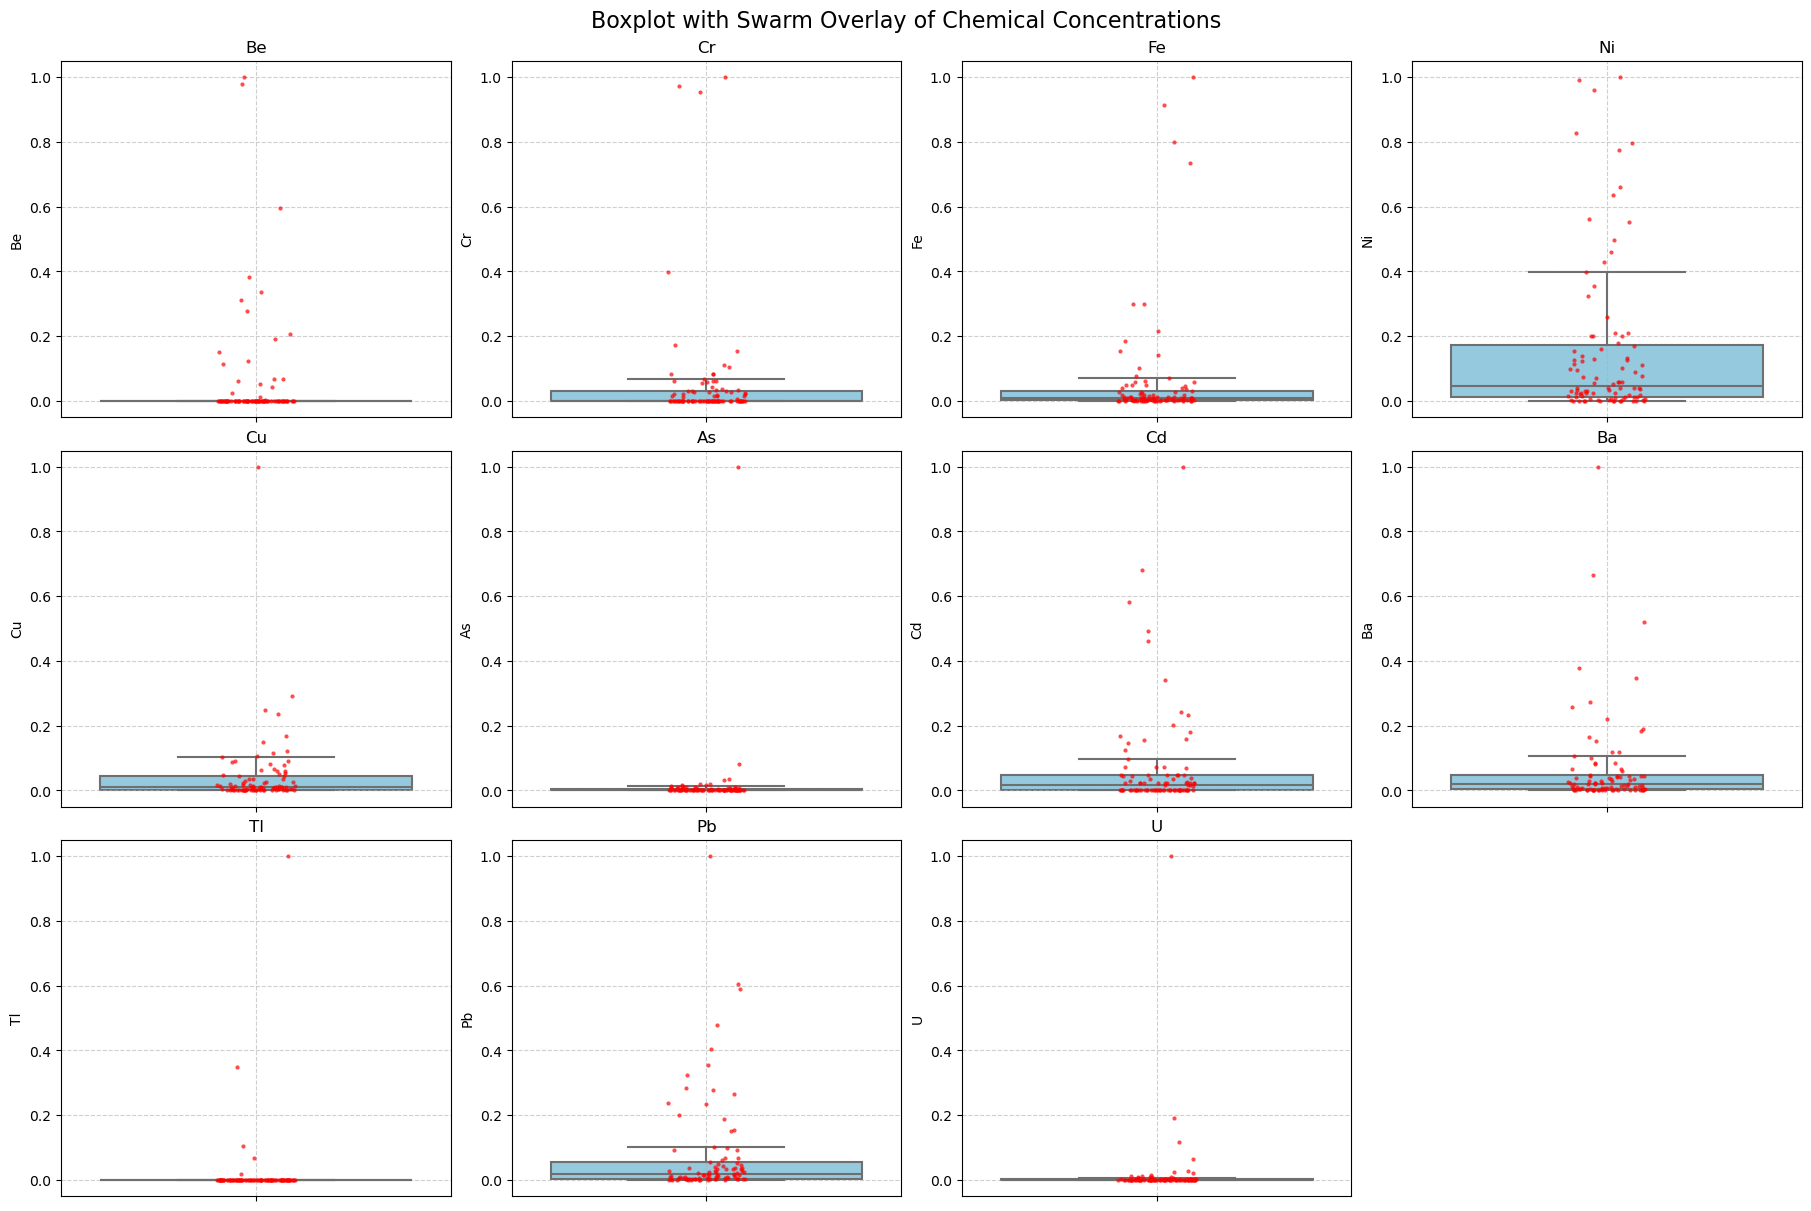

In [7]:
# List of chemical columns
chemical_columns = ['Be', 'Cr', 'Fe', 'Ni', 'Cu', 'As', 'Cd', 'Ba', 'Tl', 'Pb', 'U']

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(18, 12), constrained_layout=True)
fig.suptitle("Boxplot with Swarm Overlay of Chemical Concentrations", fontsize=16)

# Flatten axes array for easier iteration
axes = axes.flatten()

# Loop through each chemical and plot on a separate subplot
for i, chemical in enumerate(chemical_columns):
    # Plot boxplot
    sns.boxplot(data=data, y=chemical, ax=axes[i], color='skyblue', fliersize=0)  # Hide boxplot outliers
    # Overlay with a swarm plot for individual points
    sns.stripplot(data=data, y=chemical, ax=axes[i], color='red', size=3, alpha=0.7, jitter=True)

    axes[i].set_title(chemical, fontsize=12)
    axes[i].grid(True, linestyle='--', alpha=0.6)

# Remove any empty subplots if necessary
for j in range(len(chemical_columns), len(axes)):
    fig.delaxes(axes[j])

plt.show()

- As we can observer there are 3 extreme outliers that can be identified in "U", "As" and "Cu".

| Index | Sample No | Distance (Light) | Distance (Dark) | Be           | Cr   | Fe         | Ni         | Cu         | As         | Cd           | Ba         | Tl        | Pb          | U         |
|-------|-----------|------------------|------------------|--------------|------|------------|------------|------------|------------|--------------|------------|-----------|-------------|-----------|
| 61    | 62        | 14498.98855      | 20847.32446     | 0            | 0.16 | 16.09      | 0          | 1.71       | 6.7        | 0            | 4.18       | 0         | 0.15        | 3274.37   |
| 4     | 5         | 6314.452792      | 11545.98501     | 0.020337997  | 0    | 407.938826 | 0.290261554| 4.060582802| 717.9055848| 0            | 5.453000897| 0         | 0.509852443 | 0.341408354 |
| 69    | 70        | 5886.388686      | 5743.666992     | 0            | 0    | 2.456078691| 0.666977774| 3228.014515| 0.081894201| 0.014549819  | 13.09903901| 0         | 11.83299878 | 0.015667485 |



- Further more we applied Crook's distance to analyze more about potential outlier points

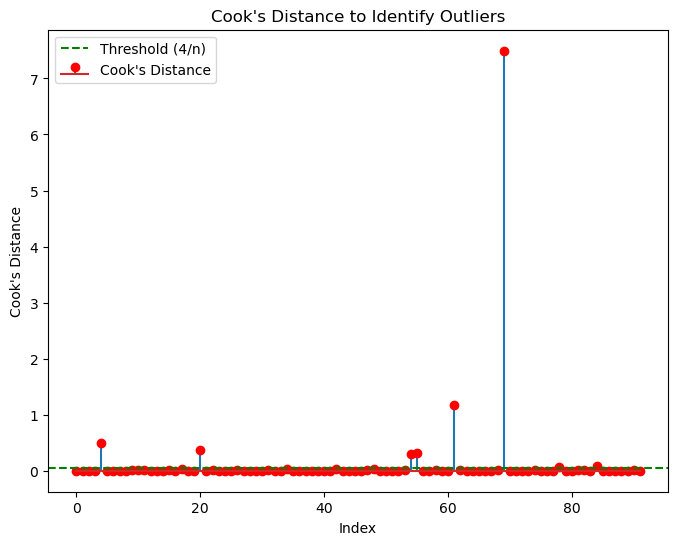

Potential outliers based on Cook's Distance: [ 4 20 54 55 61 69 78 84]


In [12]:
# Define the predictors and the response variable
X = data[['Be', 'Cr', 'Fe', 'Ni', 'Cu', 'As', 'Cd', 'Ba', 'Tl', 'Pb', 'U']]
y = data['Distance (Light)']  # or y = data['Distance (Dark)'] for the dark model

# Fit the regression model
X_with_const = sm.add_constant(X)  # Add a constant (intercept) to the model
model = sm.OLS(y, X_with_const).fit()

# Calculate Cook's Distance
influence = model.get_influence()
cooks_d = influence.cooks_distance[0]

# Plot Cook's Distance
plt.figure(figsize=(8, 6))
plt.stem(np.arange(len(cooks_d)), cooks_d, markerfmt='ro', label="Cook's Distance")
plt.axhline(y=4/len(X), color='g', linestyle='--', label="Threshold (4/n)")
plt.xlabel('Index')
plt.ylabel("Cook's Distance")
plt.legend()
plt.title("Cook's Distance to Identify Outliers")
plt.show()

# Identify potential outliers
threshold = 4 / len(X)
outliers = np.where(cooks_d > threshold)[0]
print(f"Potential outliers based on Cook's Distance: {outliers}")

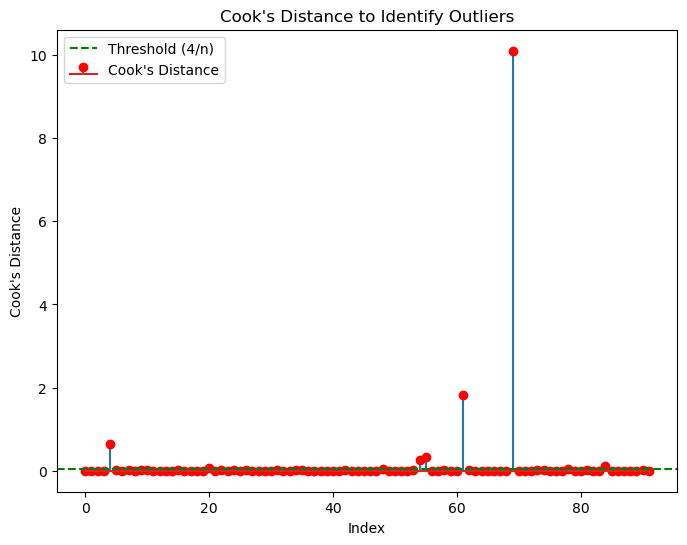

Potential outliers based on Cook's Distance: [ 4 20 54 55 61 69 84]


In [10]:
# Define the predictors and the response variable
X = data[['Be', 'Cr', 'Fe', 'Ni', 'Cu', 'As', 'Cd', 'Ba', 'Tl', 'Pb', 'U']]
y = data['Distance (Dark)']  # or y = data['Distance (Dark)'] for the dark model

# Fit the regression model
X_with_const = sm.add_constant(X)  # Add a constant (intercept) to the model
model = sm.OLS(y, X_with_const).fit()

# Calculate Cook's Distance
influence = model.get_influence()
cooks_d = influence.cooks_distance[0]

# Plot Cook's Distance
plt.figure(figsize=(8, 6))
plt.stem(np.arange(len(cooks_d)), cooks_d, markerfmt='ro', label="Cook's Distance")
plt.axhline(y=4/len(X), color='g', linestyle='--', label="Threshold (4/n)")
plt.xlabel('Index')
plt.ylabel("Cook's Distance")
plt.legend()
plt.title("Cook's Distance to Identify Outliers")
plt.show()

# Identify potential outliers
threshold = 4 / len(X)
outliers = np.where(cooks_d > threshold)[0]
print(f"Potential outliers based on Cook's Distance: {outliers}")

- By analysing Crook's distance and outlier by box plot. These poits were decided to remove as outlers

| Sample No | Distance (Light) | Distance (Dark) | Be           | Cr   | Fe         | Ni         | Cu         | As         | Cd           | Ba         | Tl        | Pb          | U         |
|-----------|------------------|------------------|--------------|------|------------|------------|------------|------------|--------------|------------|-----------|-------------|-----------|
| 5         | 6314.452792      | 11545.98501      | 0.020337997  | 0    | 407.938826 | 0.290261554| 4.060582802| 717.9055848| 0            | 5.453000897| 0         | 0.509852443 | 0.341408354 |
| 21        | 5012.316069      | 6289.409351      | 0.47         | 0    | 81.13      | 6.82       | 31.31      | 0.07       | 0.19         | 131.78     | 0.29      | 0.38        | 0.03      |
| 55        | 2807.9119        | 2500.309747      | 0            | 0    | 31.12      | 7.11       | 393.8      | 0.33       | 0.14         | 5.52       | 0         | 20.09       | 0.07      |
| 56        | 5657.379465      | 7451.0618        | 0            | 0    | 41.22032054| 0.087041227| 9.788755846| 0.521494349| 0            | 197.6416113| 0         | 0.074203131 | 0.519692032 |
| 62        | 14498.98855      | 20847.32446      | 0            | 0.16 | 16.09      | 0          | 1.71       | 6.7        | 0            | 4.18       | 0         | 0.15        | 3274.37   |
| 70        | 5886.388686      | 5743.666992      | 0            | 0    | 2.456078691| 0.666977774| 3228.014515| 0.081894201| 0.014549819  | 13.09903901| 0         | 11.83299878 | 0.015667485 |
| 79        | 2917.79606       | 2983.965297      | 0.460127672  | 0.119978472 | 55.2395846 | 1.087481733| 167.4247272| 0.072112084| 0.064507228| 11.82068304| 0         | 3.121952736 | 0.699671444 |
| 85        | 675.63419        | 605.6598773      | 0.010785771  | 0.025848193 | 295.9324583 | 0.23874751 | 541.6583886| 0.104134734| 0.060822216| 1.378598965| 0         | 6.546185653 | 0.028964137 |


In [13]:
# Define the indices of the rows to be removed
sample_nos_to_remove = [5,21,55,56,62,70,79,85]

# Remove these rows from the original DataFrame
initial_outliers_removed_dataset = data[~data['Sample No'].isin(sample_nos_to_remove)]

scaled_data = initial_outliers_removed_dataset.copy()
scaled_data[chemical_columns] = scaler.fit_transform(initial_outliers_removed_dataset[chemical_columns])

## Saving the pre processed dataset

In [15]:
scaled_data.to_csv('../data/preprocessed_dataset.csv', index=False)